In [4]:
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader

In [5]:
wc_data = pd.read_csv('datasets/wc98_workload_hour.csv')
wc_data.head(15)

,timestamp,count
0,1998-04-30 21:00:00,324
1,1998-04-30 22:00:00,51622
2,1998-04-30 23:00:00,46813
3,1998-05-01 00:00:00,39482
4,1998-05-01 01:00:00,36221
5,1998-05-01 02:00:00,36270
6,1998-05-01 03:00:00,39474
7,1998-05-01 04:00:00,36275
8,1998-05-01 05:00:00,28446
9,1998-05-01 06:00:00,29755


In [7]:
len(wc_data)

1466

In [8]:
wc_data['timestamp'] = pd.to_datetime(wc_data.timestamp)
wc_data.head()

,timestamp,count
0,1998-04-30 21:00:00,324
1,1998-04-30 22:00:00,51622
2,1998-04-30 23:00:00,46813
3,1998-05-01 00:00:00,39482
4,1998-05-01 01:00:00,36221


In [9]:
wc_data['hour'], wc_data['day'], wc_data['month'] = wc_data.timestamp.dt.hour, wc_data.timestamp.dt.day, \
                                                    wc_data.timestamp.dt.month
wc_data.head()

,timestamp,count,hour,day,month
0,1998-04-30 21:00:00,324,21,30,4
1,1998-04-30 22:00:00,51622,22,30,4
2,1998-04-30 23:00:00,46813,23,30,4
3,1998-05-01 00:00:00,39482,0,1,5
4,1998-05-01 01:00:00,36221,1,1,5


In [10]:
# Select features and target
selected_features = ['day', 'month', 'hour']
features = wc_data[selected_features]

target = wc_data['count']
target.head()

0      324
1    51622
2    46813
3    39482
4    36221
Name: count, dtype: int64

In [27]:
input_size = len(selected_features)
n_steps = 10
batch_size = 1
n_neurons = 30
n_outputs = 1

Set up RNN
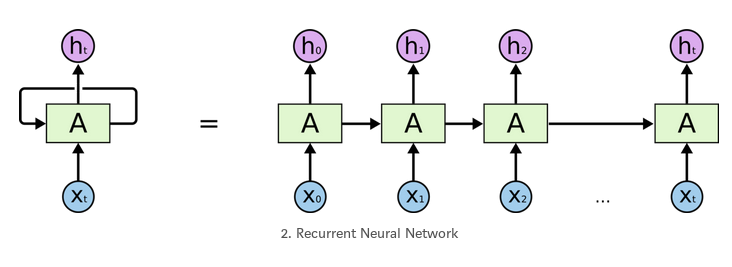

In [88]:
class RNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(RNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        self.rnn = nn.RNN(self.n_inputs, self.n_neurons)
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
    
    def forward(self, X):
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
        
        lstm_out, self.hidden = self.rnn(X, self.hidden)
        
    def init_hidden(self):
        return torch.zeros(1, self.batch_size, self.n_neurons)

In [89]:
model = RNN(batch_size, n_steps, input_size, n_neurons, n_outputs)
print(model)

RNN(
  (rnn): RNN(3, 30)
  (FC): Linear(in_features=30, out_features=1, bias=True)
)


In [90]:
test_data = features[:10]
test_data = Variable(torch.FloatTensor([test_data.values]))
test_data = test_data.view(10, -1, 3)
test_data

tensor([[[30.,  4., 21.]],

        [[30.,  4., 22.]],

        [[30.,  4., 23.]],

        [[ 1.,  5.,  0.]],

        [[ 1.,  5.,  1.]],

        [[ 1.,  5.,  2.]],

        [[ 1.,  5.,  3.]],

        [[ 1.,  5.,  4.]],

        [[ 1.,  5.,  5.]],

        [[ 1.,  5.,  6.]]])

In [107]:
out, hid = model(test_data)

TypeError: 'NoneType' object is not iterable

In [92]:
a = torch.tensor([1]).double()
a

tensor([1.], dtype=torch.float64)